In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

from collections import defaultdict
import warnings

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/countifs/kaggle/main/6.%20Cirrhosis%20Prediction%20Dataset/cirrhosis.csv')

In [5]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [6]:
df.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [7]:
df['Age'] = df['Age']/365

In [8]:
df['Age'] = df['Age'].astype('int64')

In [9]:
df['Age']

0      58
1      56
2      70
3      54
4      38
       ..
413    67
414    39
415    57
416    58
417    53
Name: Age, Length: 418, dtype: int64

In [10]:
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [11]:
import missingno as msno

In [12]:
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

<AxesSubplot:>

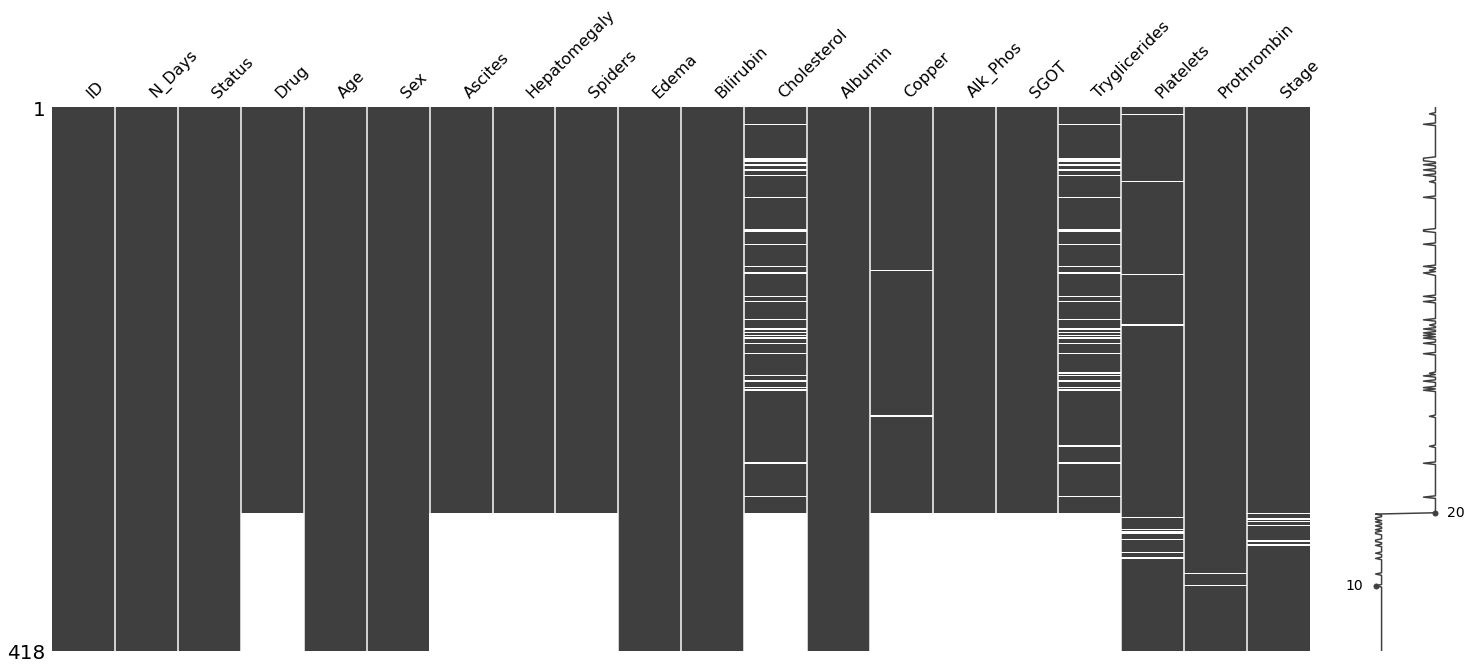

In [13]:
msno.matrix(df)

In [14]:
df.dropna(inplace=True)

<AxesSubplot:>

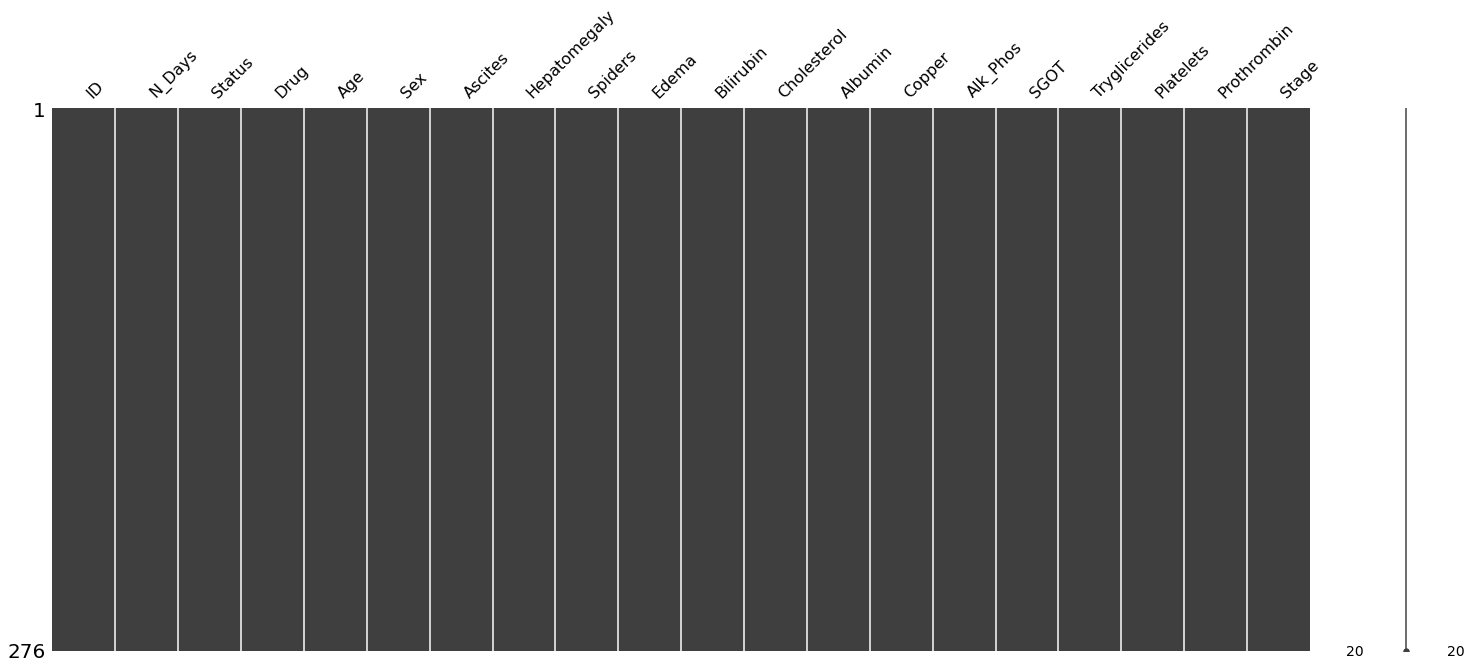

In [15]:
msno.matrix(df)

In [16]:
# 'object' Class 값 확인
df_object_columns = df.select_dtypes(include=['object']).columns
print()

for i in df_object_columns:
    print('컬럼명 : ', i )
    print(df[i].value_counts())
    print("=================================")
    print()


컬럼명 :  Status
C     147
D     111
CL     18
Name: Status, dtype: int64

컬럼명 :  Drug
Placebo            140
D-penicillamine    136
Name: Drug, dtype: int64

컬럼명 :  Sex
F    242
M     34
Name: Sex, dtype: int64

컬럼명 :  Ascites
N    257
Y     19
Name: Ascites, dtype: int64

컬럼명 :  Hepatomegaly
Y    142
N    134
Name: Hepatomegaly, dtype: int64

컬럼명 :  Spiders
N    196
Y     80
Name: Spiders, dtype: int64

컬럼명 :  Edema
N    234
S     25
Y     17
Name: Edema, dtype: int64



In [17]:
df['Stage'] = df['Stage'].astype('int64')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 311
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             276 non-null    int64  
 1   N_Days         276 non-null    int64  
 2   Status         276 non-null    object 
 3   Drug           276 non-null    object 
 4   Age            276 non-null    int64  
 5   Sex            276 non-null    object 
 6   Ascites        276 non-null    object 
 7   Hepatomegaly   276 non-null    object 
 8   Spiders        276 non-null    object 
 9   Edema          276 non-null    object 
 10  Bilirubin      276 non-null    float64
 11  Cholesterol    276 non-null    float64
 12  Albumin        276 non-null    float64
 13  Copper         276 non-null    float64
 14  Alk_Phos       276 non-null    float64
 15  SGOT           276 non-null    float64
 16  Tryglicerides  276 non-null    float64
 17  Platelets      276 non-null    float64
 18  Prothrombi

In [19]:
df['Stage'].dtype

dtype('int64')

In [20]:
df['Stage'].value_counts()

3    111
4     94
2     59
1     12
Name: Stage, dtype: int64

In [21]:
df.drop(columns='ID', inplace = True)

In [22]:
df.reset_index(inplace=True, drop=True)

In [23]:
df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,400,D,D-penicillamine,58,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4
1,4500,C,D-penicillamine,56,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3
2,1012,D,D-penicillamine,70,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4
3,1925,D,D-penicillamine,54,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4
4,1504,CL,Placebo,38,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,1153,C,D-penicillamine,61,F,N,Y,N,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2
272,994,C,Placebo,58,F,N,N,N,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2
273,939,C,D-penicillamine,62,F,N,N,N,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2
274,839,C,D-penicillamine,38,F,N,N,N,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2


In [24]:
# # Class 속성 값 변경
# for i in df_object_columns:
#     print(f'Catagory of {i}')
#     catlist = df[i].unique()
#     for j, val in enumerate(catlist):
#          dftobjfinal = df[i].replace({val:j},inplace=True)
#          #print(dftobjfinal)
#          print(j,val)
#     print('--------------------------------')

In [25]:
# df['Stage'] = df['Stage'].apply(lambda x : '4번' if x == 4 
#                                 else '3번' if x == 3 
#                                 else '2번' if x == 2 
#                                 else '1번')

In [26]:
df['Stage'] = df['Stage'].apply(lambda x : 1 if x == 4 
                                else 0)

In [27]:
df['Stage'].value_counts()

0    182
1     94
Name: Stage, dtype: int64

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from modules.stableDT import stableDecisionTree # file 제공
from modules.stableDT import visualize_tree # file 제공

In [29]:
X = df.iloc[:,:-1].copy()

In [30]:
y = df['Stage'].copy()

In [31]:
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split

# training : test 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1333)

In [33]:
min_sample_ratio = 0.03 # 최소 샘플 수로 dataset의 샘플 수의 3%
#max_depth = 4
impurity_measure='entropy'
iter_num=30

clf = stableDecisionTree(
    min_sample = min_sample_ratio*len(X), 
    iter_num = iter_num,
    impurity_measure = impurity_measure)
clf.fit(X_train,y_train)

In [34]:
# predictive performance
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

pred_y = clf.predict(X_test)
acc = accuracy_score(y_test,pred_y)
f1 = f1_score(y_test, pred_y)
acc, f1

(0.7142857142857143, 0.5)

In [35]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[32  8]
 [ 8  8]]


In [36]:
# exporting rules to text
clf.export_text()

IF Hepatomegaly != N AND Prothrombin > 10.9 AND Age > 50.0 AND Alk_Phos > 2132.0 THEN y = 1
IF Hepatomegaly != N AND Prothrombin <= 10.9 AND Albumin <= 3.36 AND Bilirubin > 1.1 AND Copper <= 65.0 THEN y = 1
IF Hepatomegaly == N AND N_Days <= 1349.0 AND Age <= 41.0 AND N_Days > 1293.0 THEN y = 1
IF Hepatomegaly == N AND N_Days <= 1349.0 AND Age > 41.0 AND Cholesterol <= 412.0 AND Sex == F THEN y = 1
IF Hepatomegaly != N AND Prothrombin > 10.9 AND Age <= 50.0 AND Tryglicerides > 90.0 AND N_Days <= 1191.0 AND Albumin <= 3.23 THEN y = 1
IF Hepatomegaly != N AND Prothrombin > 10.9 AND Age <= 50.0 AND Tryglicerides <= 90.0 AND Edema != Y THEN y = 1
IF Hepatomegaly != N AND Prothrombin <= 10.9 AND Albumin > 3.36 AND Copper > 52.5 AND Cholesterol <= 360.0 AND Tryglicerides > 93.0 THEN y = 1
IF Hepatomegaly != N AND Prothrombin <= 10.9 AND Albumin > 3.36 AND Copper <= 52.5 AND Bilirubin > 1.3 THEN y = 1
IF Hepatomegaly != N AND Prothrombin > 10.9 AND Age > 50.0 AND Alk_Phos <= 2132.0 THEN y = 1

In [ ]:
clf.d

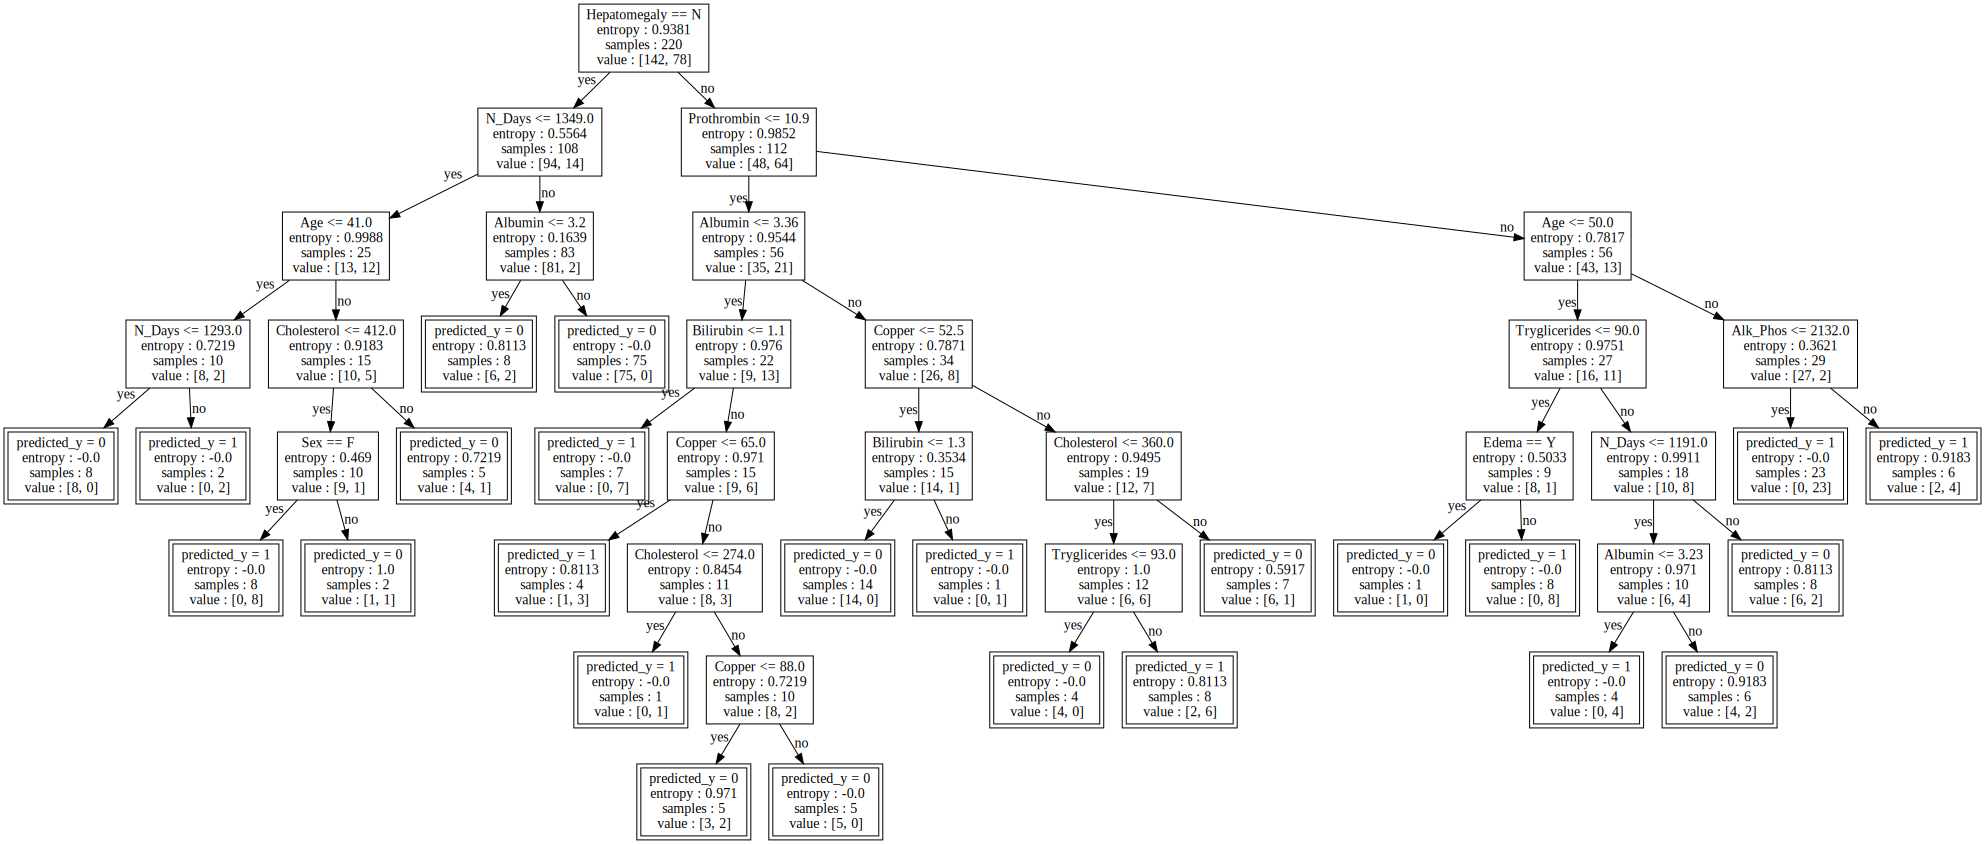

In [71]:
# images
visualize_tree(clf.root)

In [38]:
from modules.stableCRI import stable_concise_rule_induction # file 제공

dataset = df.copy()
target_name = 'Stage' # target name을 꼭 입력해주시길 바랍니다.
colnm = dataset.columns
X = dataset.loc[:,colnm [colnm != target_name]]
y = dataset.loc[:, target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

# Concatenating X,y -> training dataset([X_train,y_train]), test dataset([X_test,y_test]) 
train_idx, test_idx = X_train.index, X_test.index
df_train, df_test = dataset.loc[train_idx,:], dataset.loc[test_idx,:]

In [39]:
min_sample_ratio = 0.03
min_samples = round(min_sample_ratio * len(df_train))
max_depth = 100 # 처음에는 2 또는 3으로 설정해서 돌려보고, 소요시간을 체크해보시기 바랍니다.

cri = stable_concise_rule_induction(min_samples = min_samples, max_depth = max_depth)
cri.fit(data = df_train, target_name = target_name, iter_num = 20, rule_rate = 0.9) 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [40]:
# predictive performance
# f1 : macro-averaging for multiclass
pred_y, acc, f1 = cri.predict(df_test)
acc,f1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


(0.7857, 0.7268)

In [39]:
# confusion matrix
cm = confusion_matrix(y_test, pred_y)
print(cm)

[[35  5]
 [ 7  9]]


In [57]:
# rules
cri.export_text()

IF ['Bilirubin < 0.55'] THEN Stage = 0   (homogeneity = 1.0 , coverage = 0.1 )
IF ['Ascites == Y'] THEN Stage = 1   (homogeneity = 1.0 , coverage = 0.0727 )
IF ['Albumin >= 3.995'] THEN Stage = 0   (homogeneity = 0.9583 , coverage = 0.1091 )
IF ['Albumin >= 4.0'] THEN Stage = 0   (homogeneity = 0.9583 , coverage = 0.1091 )
IF ['N_Days < 565.0'] THEN Stage = 1   (homogeneity = 0.8421 , coverage = 0.0864 )
IF ['Hepatomegaly != Y'] THEN Stage = 0   (homogeneity = 0.8725 , coverage = 0.4636 )
IF ['Hepatomegaly != Y'] THEN Stage = 0   (homogeneity = 0.8725 , coverage = 0.4636 )
IF ['Bilirubin >= 0.55', 'Ascites != Y', 'Albumin < 3.995', 'Albumin < 4.0', 'N_Days >= 565.0', 'Hepatomegaly == Y', 'Platelets < 140.5'] THEN Stage = 1   (homogeneity = 0.9 , coverage = 0.0455 )
IF ['Alk_Phos >= 3191.0'] THEN Stage = 0   (homogeneity = 0.6786 , coverage = 0.1273 )
IF ['Prothrombin >= 11.45'] THEN Stage = 1   (homogeneity = 0.7368 , coverage = 0.1727 )
IF ['Bilirubin >= 0.55', 'Ascites != Y', 'Albumi

In [69]:
type(cri.export_text())

IF ['Bilirubin < 0.55'] THEN Stage = 0   (homogeneity = 1.0 , coverage = 0.1 )
IF ['Ascites == Y'] THEN Stage = 1   (homogeneity = 1.0 , coverage = 0.0727 )
IF ['Albumin >= 3.995'] THEN Stage = 0   (homogeneity = 0.9583 , coverage = 0.1091 )
IF ['Albumin >= 4.0'] THEN Stage = 0   (homogeneity = 0.9583 , coverage = 0.1091 )
IF ['N_Days < 565.0'] THEN Stage = 1   (homogeneity = 0.8421 , coverage = 0.0864 )
IF ['Hepatomegaly != Y'] THEN Stage = 0   (homogeneity = 0.8725 , coverage = 0.4636 )
IF ['Hepatomegaly != Y'] THEN Stage = 0   (homogeneity = 0.8725 , coverage = 0.4636 )
IF ['Bilirubin >= 0.55', 'Ascites != Y', 'Albumin < 3.995', 'Albumin < 4.0', 'N_Days >= 565.0', 'Hepatomegaly == Y', 'Platelets < 140.5'] THEN Stage = 1   (homogeneity = 0.9 , coverage = 0.0455 )
IF ['Alk_Phos >= 3191.0'] THEN Stage = 0   (homogeneity = 0.6786 , coverage = 0.1273 )
IF ['Prothrombin >= 11.45'] THEN Stage = 1   (homogeneity = 0.7368 , coverage = 0.1727 )
IF ['Bilirubin >= 0.55', 'Ascites != Y', 'Albumi

NoneType

In [41]:
cri.df_concise_rule

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
Rule,Bilirubin < 0.55,"Bilirubin >= 0.55, Ascites != Y, Albumin < 3.9...",Ascites == Y,Albumin >= 3.995,Albumin >= 4.0,"Bilirubin >= 0.55, Ascites != Y, Albumin < 3.9...",Hepatomegaly != Y,Hepatomegaly != Y,N_Days < 565.0,"Bilirubin >= 0.55, Ascites != Y, Albumin < 3.9...",Cholesterol >= 440.0,Prothrombin >= 11.45,Alk_Phos < 985.0,"Bilirubin >= 0.55, Ascites != Y, Albumin < 3.9...",Alk_Phos >= 3191.0,"Bilirubin >= 0.55, Ascites != Y, Albumin < 3.9...",Albumin < 3.23
pred_y,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,1
Homogeneity,1.0,1.0,1.0,0.9583,0.9583,0.9,0.8725,0.8725,0.8421,0.7778,0.7442,0.7368,0.7313,0.6923,0.6786,0.6667,0.6444
Coverage,0.1,0.0273,0.0727,0.1091,0.1091,0.0455,0.4636,0.4636,0.0864,0.0409,0.1955,0.1727,0.3045,0.0591,0.1273,0.0409,0.2045
# of condition,1.0,15.0,1.0,1.0,1.0,7.0,1.0,1.0,1.0,9.0,1.0,1.0,1.0,11.0,1.0,16.0,1.0


In [42]:
# dataset not included in rules
cri.others_df

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
214,1785,C,Placebo,55,F,N,Y,N,N,0.8,324.0,3.51,39.0,1237.0,66.65,146.0,371.0,10.0,0
269,1216,C,Placebo,56,F,N,Y,N,N,0.6,239.0,3.45,31.0,1072.0,55.00,64.0,227.0,10.7,0
212,1435,CL,D-penicillamine,32,F,N,Y,N,N,2.1,387.0,3.77,63.0,1613.0,150.35,33.0,185.0,10.1,1
162,2456,C,Placebo,50,F,N,Y,N,N,1.3,360.0,3.63,52.0,1812.0,97.65,164.0,256.0,9.9,0
188,2050,C,Placebo,56,F,N,Y,N,N,0.9,360.0,3.65,72.0,3186.0,94.55,154.0,269.0,9.7,1
180,2224,C,Placebo,49,M,N,Y,N,N,0.9,346.0,3.37,81.0,1098.0,122.45,90.0,298.0,10.0,0
216,1769,C,Placebo,40,F,N,Y,N,N,0.6,299.0,3.36,23.0,2769.0,220.10,85.0,303.0,10.9,1
153,2573,C,Placebo,43,F,N,Y,N,N,1.8,396.0,3.83,39.0,2148.0,102.30,133.0,278.0,9.9,1
150,2657,C,D-penicillamine,30,F,N,Y,Y,N,3.0,236.0,3.42,76.0,1403.0,89.90,86.0,493.0,9.8,0


In [41]:
def _coverage(subset,n):
    return subset.shape[0]/n
def _homogeneity(y):
    _, counts = np.unique(y, return_counts=True)
    ps = counts / len(y)
    return max(ps)
def coverHomo(dataset, target_name, col, operator):         
    coverage = []
    homogeneity = []
    unique_values = np.unique(dataset[col])
    ops = {"<=": (lambda x,y: x<=y), ">=": (lambda x,y: x>=y)}
    for cut_point in unique_values:
        subset = dataset[ops[operator] (dataset[col],cut_point)]
        coverage.append(_coverage(subset[target_name], dataset.shape[0]))
        homogeneity.append(_homogeneity(subset[target_name]))
    return coverage, homogeneity, unique_values

In [42]:
num_col = df.drop(columns=target_name).select_dtypes(include=['number']).columns.tolist()
print('numeric:',num_col)
cat_col = df.drop(columns=target_name).select_dtypes(include=['object']).columns.tolist()
print('categorical:',cat_col)

numeric: ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
categorical: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


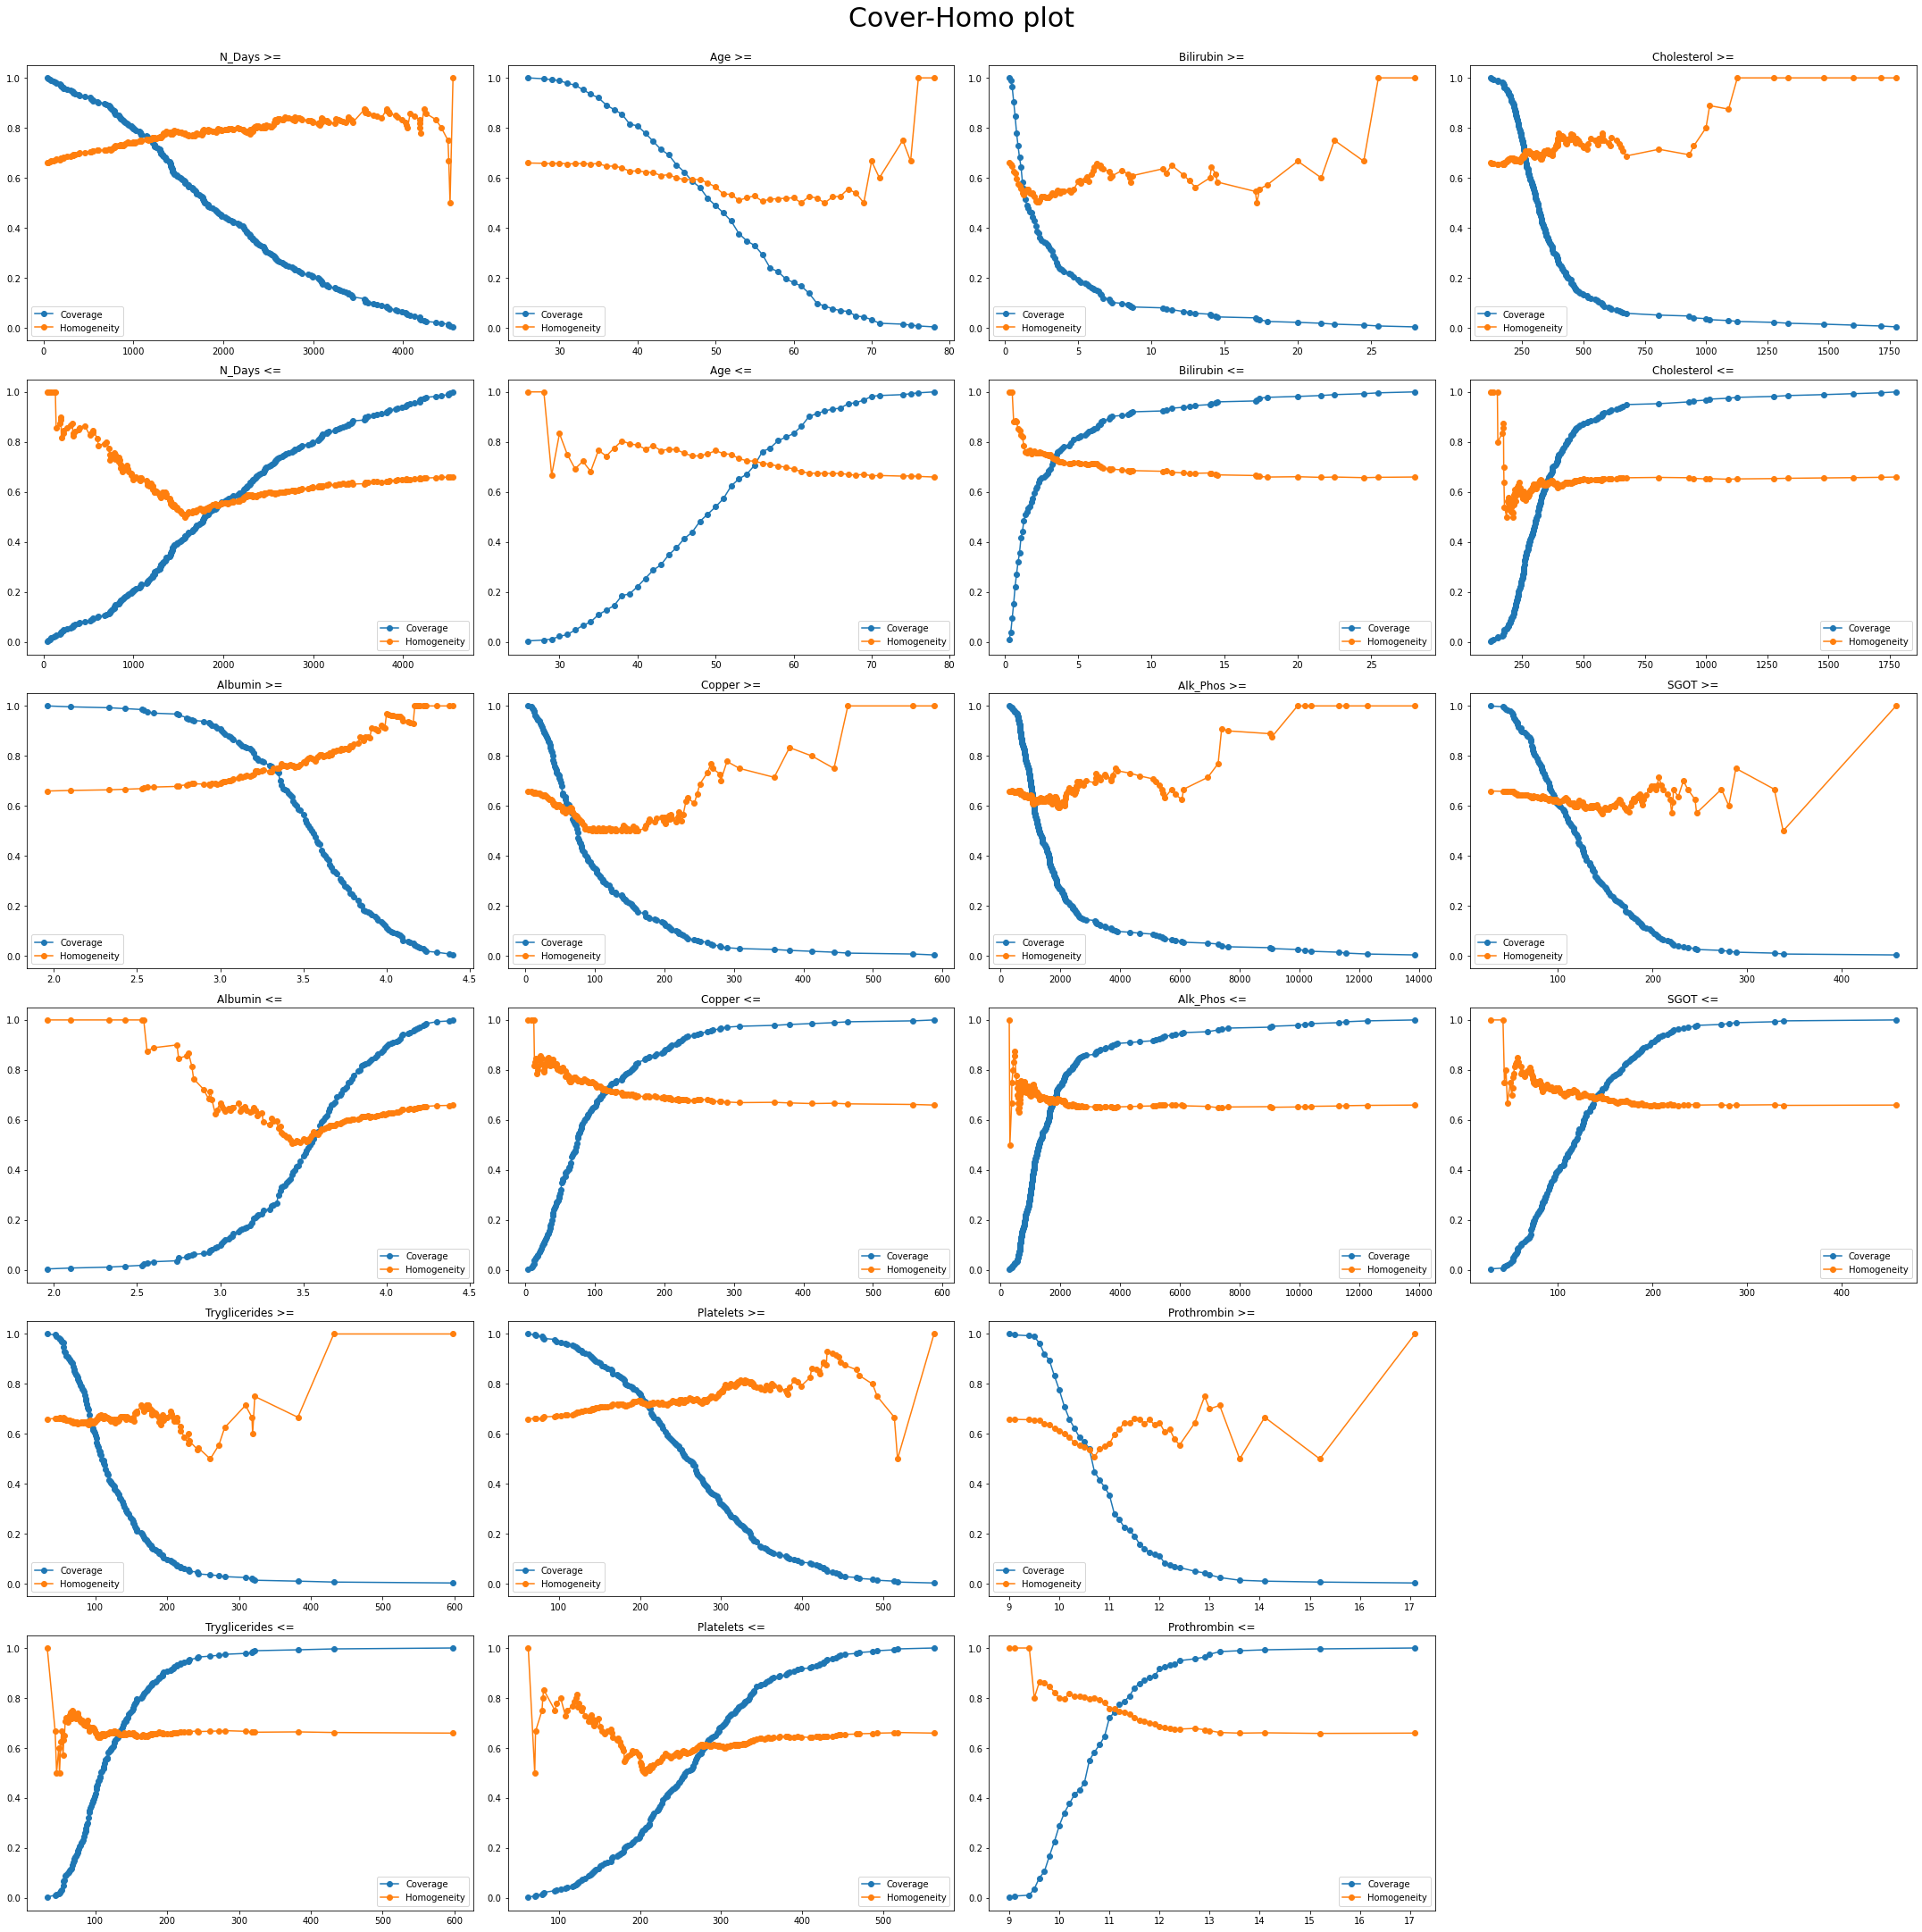

In [43]:
ncols = 4
nrows = len(num_col) // ncols + (len(num_col) % ncols > 0)
n=1
i=0

plt.figure(figsize=(30, 30)) 
for col in num_col[:]:
    ax1 = plt.subplot(nrows*2, ncols, n+i)
    cover, homo, cut_points = coverHomo(df, target_name, col, '>=')
    ax1.plot(cut_points,cover,'-o')
    ax1.plot(cut_points,homo,'-o')
    ax1.set_title(col +' >=')
    ax1.legend(['Coverage','Homogeneity'])
    ax1.set_ylim(-0.05,1.05)
    
    ax2 = plt.subplot(nrows*2, ncols, n+i+ncols)
    cover, homo, cut_points = coverHomo(df, target_name, col, '<=')
    ax2.plot(cut_points,cover,'-o')
    ax2.plot(cut_points,homo,'-o')
    ax2.set_title(col +' <=')
    ax2.legend(['Coverage','Homogeneity'])
    ax2.set_ylim(-0.05,1.05)
    if n % (ncols) == 0 : i+=ncols
    n+=1

plt.suptitle("Cover-Homo plot", fontsize=30, y=1)
plt.savefig('coverHomo.png', dpi=300, transparent=True) # save figure (dpi=300, transparent=True)
plt.tight_layout()
plt.show()    